In [2]:
##### Step 1: Import Libraries ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
###### Step 2: Load Dataset #########
iris = load_iris()

X = iris.data        # features
y = iris.target      # labels

feature_names = iris.feature_names
target_names = iris.target_names

print("Features:", feature_names)
print("Target classes:", target_names)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


In [5]:
######## Step 3: Convert to DataFrame (for visualization) ##########
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


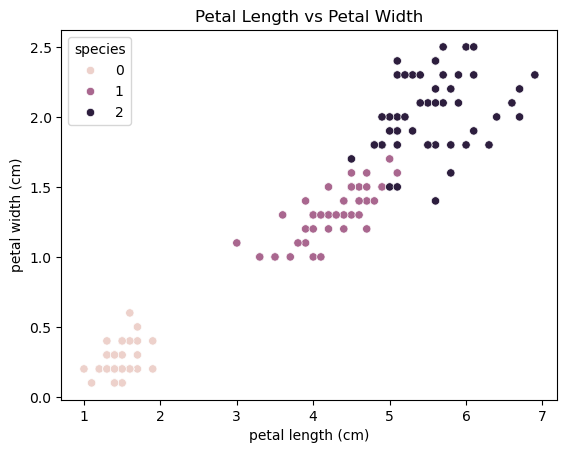

In [6]:
##### Step 4: Data Visualization ######
sns.scatterplot(
    x=df['petal length (cm)'],
    y=df['petal width (cm)'],
    hue=df['species']
)
plt.title("Petal Length vs Petal Width")
plt.show()

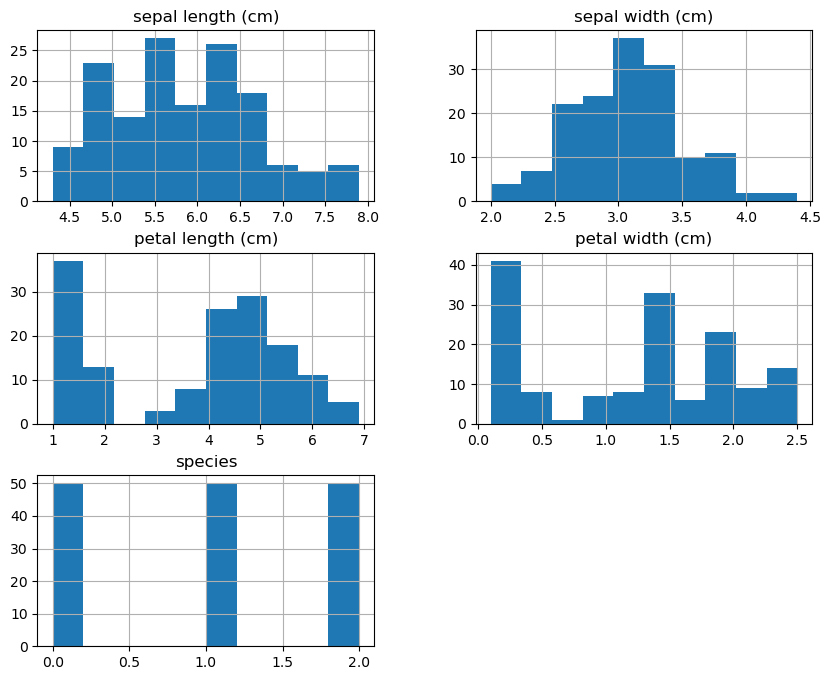

In [7]:
 ##### Histogram #####
df.hist(figsize=(10,8))
plt.show()

In [8]:
#### Step 5: Train–Test Split ####
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
#### Step 6: Feature Scaling ####
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
##### Step 7: Train Model (K-Nearest Neighbors) ####
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
### Step 8: Predictions ####
y_pred = model.predict(X_test)


In [17]:
### Step 9: Evaluation ##
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


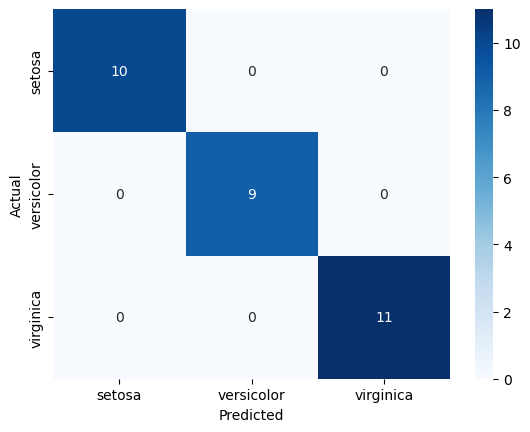

In [18]:
### Confusion Matrix ###
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [19]:
### Classification Report ###
print(classification_report(y_test, y_pred, target_names=target_names))



              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

